In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
from scipy.stats import t

# Power Analysis: required sample size

 - A 5% base conversion rate
 - A 5% (relative) MDE
 - 80% power
 - 95% confidence (two-sided)
 - A 50/50 traffic split
 - 10,000 users per variant per day of traffic

With standard assumptions, we can calculate that the required sample size is about 122,000 per variant. 

In [2]:
p0 = 0.05  # Base conversion rate
mde = 0.0025  # relative MDE -- MDE 5% * Base Conversion Rate
p1 = p0 + mde  # Conversion rate under the alternative hypothesis
alpha = 0.05  # Significance level (two-sided)
power = 0.80  # Statistical power (1 - beta)


$$n = 16\frac{\sigma^2}{\Delta^2}$$

In [4]:
16 * p0*(1-p0)/mde**2

121600.0

Power Analysis using Statsmodels

In [5]:
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=0.0025/np.sqrt(p0*(1-p0)), alpha=0.05, power=0.8, alternative='two-sided')
sample_size

119303.64186541685

In [6]:
users_per_day = 10000
test_duration = sample_size/users_per_day
round(test_duration)

12

### Impact of Removing Dilution

When you test a change visible only to users who reach the checkout page (10% of total users), and you remove non-exposed users (users who don't reach checkout), the required sample size decreases significantly.


The base conversion rate among that group is 50%, but we only obtain 1,000 of those "exposed" users per variant per day. Importantly, this is the only checkout flow, so the conversion rate among non-exposed users is zero.


In [19]:
checkout_rate = 0.10
base_conversion_rate = 0.5
relative_mde = base_conversion_rate*0.05

In [22]:
elegible_users_per_day = users_per_day * checkout_rate

In [23]:
sample_size = 16 * base_conversion_rate*(1-base_conversion_rate)/relative_mde**2

In [24]:
sample_size/elegible_users_per_day

6.3999999999999995

# WI

In [60]:
n = 1000
sample_1 = np.random.normal(loc=1000, scale=65, size=n)
sample_2 = np.random.normal(loc=1002, scale=65, size=n)

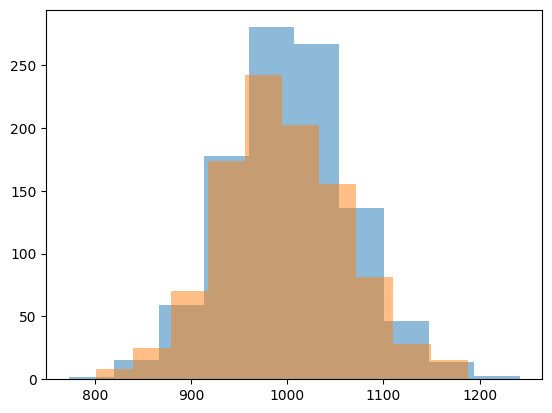

In [61]:
plt.hist(sample_1, alpha=0.5)
plt.hist(sample_2, alpha=0.5)
plt.show()

$$H_0: \mu_1 = \mu_2$$

$$H_a: \mu_1 \neq \mu_2$$


In [62]:
def std_error_difference_in_means(s_1, s_2, n_1, n_2):
    return np.sqrt((s_1**2/n_1) + (s_2**2/n_2))


In [77]:
(1010 - 1000) / 1000

0.01

In [96]:
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=0.01, alpha=0.05, power=0.6, alternative='two-sided')
sample_size

97972.4403928821

In [97]:
n = round(sample_size)
sample_1 = np.random.normal(loc=1000, scale=65, size=n)
sample_2 = np.random.normal(loc=1010, scale=65, size=n)

In [98]:
x_1, s_1 = np.mean(sample_1), np.std(sample_1) 
x_2, s_2 = np.mean(sample_2), np.std(sample_2)

std_error = std_error_difference_in_means(s_1, s_2, n, n)

t_statistic = (x_1 - x_2)/ std_error
t_statistic




np.float64(-33.69497818316843)

In [99]:
df = n-1  # Degrees of freedom
# Two-tailed p-value
p_value_two_tailed = 2 * t.sf(abs(t_statistic), df)
p_value_two_tailed

np.float64(1.801436271372218e-247)

In [100]:
p_value_lst = []
test_lst = []

for i in range(1000):
    n = round(sample_size)
    sample_1 = np.random.normal(loc=1000, scale=65, size=n)
    sample_2 = np.random.normal(loc=1010, scale=65, size=n)
    x_1, s_1 = np.mean(sample_1), np.std(sample_1) 
    x_2, s_2 = np.mean(sample_2), np.std(sample_2)
    std_error = std_error_difference_in_means(s_1, s_2, n, n)
    t_statistic = (x_1 - x_2)/ std_error
    df = n-1  # Degrees of freedom
    p_value_two_tailed = 2 * t.sf(abs(t_statistic), df)
    p_value_two_tailed

    p_value_lst.append(p_value_two_tailed)
    test_lst.append(i)
